# Plot Phum on a map (and the longitudinal mean)
# Also plot P_hum directSSP5 (opt2) vs. grwoth from WB opt(1)

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import gridspec
fs=20 #fontsize for labels, legend, ...
font={'family' : 'serif', 'size' : fs} #define font for legend
plt.rc('font', **font)
import cmocean
from mpl_toolkits.basemap import Basemap
# import via conda install basemap (for some reason pip doesnt work)

In [14]:
def area_mean_lon(x, grid):
    '''x should have dimensions: lat,lon'''
    weights=np.cos(grid.yt_j*np.pi/180)
    irrelevant,real_weights=np.meshgrid(grid.xt_i, weights)
    z=real_weights*x
    return np.sum(z)/np.sum(real_weights)

In [15]:
climber_path="/home/peter/PIK/climber/"
data=np.loadtxt(climber_path+"data_preparation/PMIP/P_hum/txt_file_each_yearJul13_11-20/P_hum_year2010.dat")
import sys
sys.path.append(climber_path+"data_preparation/PMIP/P_hum/")
from only_create_P_hum_file_script_homogeneous import get_climber_grid
grid=get_climber_grid(climber_path=climber_path)
X,Y=np.meshgrid(np.insert(grid.xu_i,0,0), grid.yu_j)

In [16]:
#from plot_selection_world_regions import change_to_Atl
def change_to_Atl(x, grid=grid):
    new_x=np.copy(x)
    #print(np.shape(new_x))
    switch=np.where(grid.xt_i>180)[0][0]
    for i in range(0,len(grid.xt_i)):
        if grid.xt_i[i]>180:
            new_x[:,i-switch]=x[:,i]
            #print(i-switch)
        else:
            new_x[:,i+switch]=x[:,i]
            #print(i+switch)
    return new_x
frlnd_atl=change_to_Atl(grid.frlnd[0])
X_atl=X-180
Y_atl=Y

In [17]:
crosses_x=[]
crosses_y=[]
for i in range(0,16):
    for j in range(0,24):
        a=grid.xt_i[i].values-180
        crosses_x.append(a)
        crosses_y.append(grid.yt_j[j].values)

# Plot 2010 Phum on map

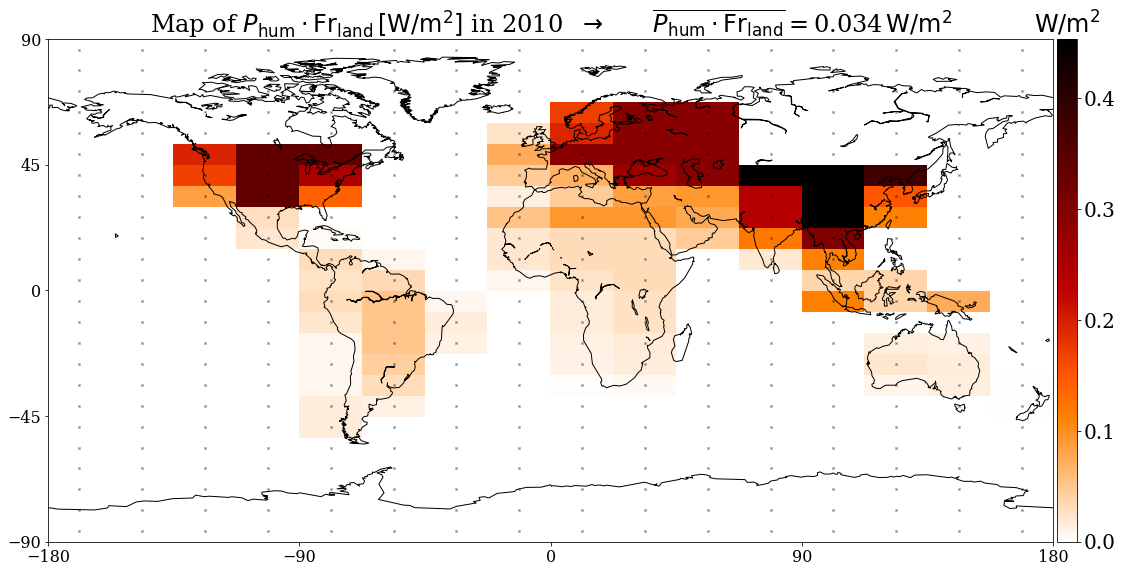

In [18]:
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)

data_atl=change_to_Atl(data*grid.frlnd[0])
Pmap =ax.pcolormesh(X_atl,Y_atl, data_atl, cmap='gist_heat_r')
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c', ax=ax)
m.drawcoastlines()

ax.set_xticks([X_atl[0,:][0],X_atl[0,:][len(X_atl[0,:])/4],X_atl[0,:][len(X_atl[0,:])/2],X_atl[0,:][len(X_atl[0,:])/4*3], X_atl[0,:][-1]])
ax.set_yticks([Y_atl[:,0][0],Y_atl[:,0][len(Y_atl[:,0])/4],Y_atl[:,0][len(Y_atl[:,0])/2],Y_atl[:,0][len(Y_atl[:,0])/4*3], Y_atl[:,0][-1]])
ax.tick_params(axis='both', which='major', labelsize=16)

ax.plot(crosses_x[:], crosses_y[:], 'x', ms=2, color='black', alpha=0.5)
ax.set_title(r"Map of $P_{\rm hum}\cdot {\rm Fr}_{\rm land} \, [{\rm W/m^2}]$ in 2010  $\rightarrow$  \
    $\overline{P_{\rm hum}\cdot {\rm Fr}_{\rm land} } =$"+'%.3f' % 
             area_mean_lon(data*grid.frlnd[0], grid)+r"$\, {\rm W/m^2}$")
ax.set_xlabel("  ")

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
cb=plt.colorbar(Pmap, cax=cax)#, label="$W/m^2$")
cb.ax.set_title(r'${\rm W/m^2}$')

#ax2.plot(lon_mean, grid.yt_j )
fig.tight_layout()
plotname="P_map_2010.eps"
plt.savefig(plotname, format='eps', bbox_inches='tight')


# Plot longitudinal mean

In [19]:
def get_P_hum_distribution(lats, P_glob=0.034):
    a=0.16180316; b= 39.67767011; c=16.63696653
    dist= a*np.exp(-(lats-b)**2/c**2)
    area_mean_dist= np.sum(np.cos(lats*np.pi/180)*dist)/np.sum(np.cos(lats*np.pi/180))
    fit_glob=area_mean_dist
    fit_normalized=P_glob/fit_glob*dist
    return fit_normalized


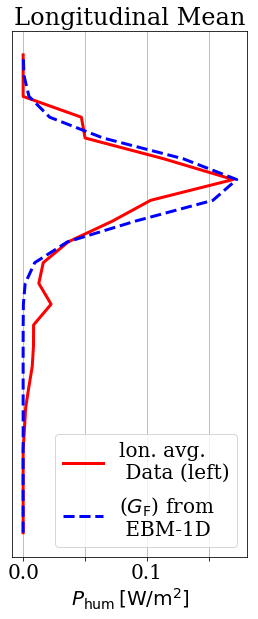

In [20]:
fig=plt.figure(figsize=(4,9))
ax=fig.add_subplot(111)
lon_mean=(data*grid.frlnd[0]).mean(axis=1)
ax.plot(lon_mean, grid.yt_j, label="lon. avg. \n Data (left)", lw=3, color='red')
ax.plot(get_P_hum_distribution(grid.yt_j, P_glob=area_mean_lon(data*grid.frlnd[0], grid)), grid.yt_j, '--',
        label=r"($G_{\rm F}$) from"+"\n EBM-1D", lw=3, color='blue')
ax.set_title("Longitudinal Mean")
ax.legend(fontsize=20, loc='lower right')
ax.set_yticks([])
ax.set_xticks([0.0, 0.05, 0.1, 0.15])
ax.set_xticklabels(["0.0", "", "0.1", ""])
ax.set_xlabel(r"$P_{\rm hum}\, [{\rm W/m^2}]$")
ax.grid()
fig.tight_layout()
plt.savefig("P_map_2010_lonMean.eps", format='eps', bbox_inches='tight')

# Plot FUTURE 

In [21]:
y=2100
data_opt2=np.loadtxt(climber_path+"data_preparation/future/txt_file_each_yearJul14_15-25opt2/P_hum_year"+str(y)+".dat")
data_opt1=np.loadtxt(climber_path+"data_preparation/future/txt_file_each_yearJul14_16-12opt1/P_hum_year"+str(y)+".dat")


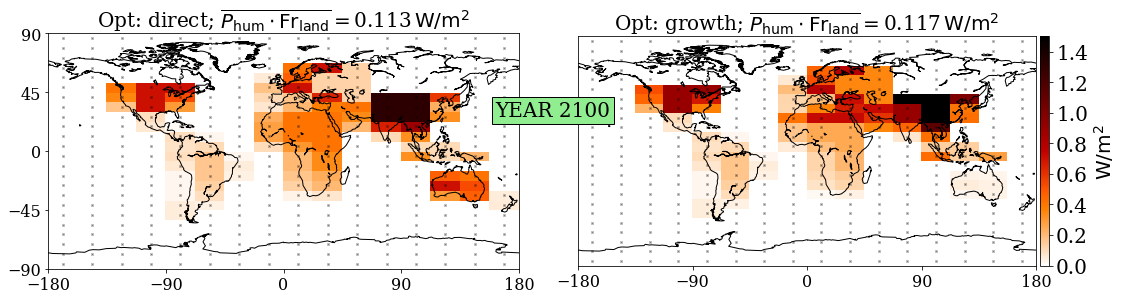

In [23]:
fig=plt.figure(figsize=(16,7))
ax=fig.add_subplot(121)
ax2=fig.add_subplot(122)

data_atl1=change_to_Atl(data_opt1*grid.frlnd[0])
data_atl2=change_to_Atl(data_opt2*grid.frlnd[0])
Pmap =ax.pcolormesh(X_atl,Y_atl, data_atl2, cmap='gist_heat_r', vmax=1.5, vmin=0.)
Pmap2 =ax2.pcolormesh(X_atl,Y_atl, data_atl1, cmap='gist_heat_r', vmax=1.5, vmin=0.)
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c', ax=ax)
m2 = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c', ax=ax2)

m.drawcoastlines()
m2.drawcoastlines()

ax.set_xticks([X_atl[0,:][0],X_atl[0,:][len(X_atl[0,:])/4],X_atl[0,:][len(X_atl[0,:])/2],X_atl[0,:][len(X_atl[0,:])/4*3], X_atl[0,:][-1]])
ax2.set_xticks([X_atl[0,:][0],X_atl[0,:][len(X_atl[0,:])/4],X_atl[0,:][len(X_atl[0,:])/2],X_atl[0,:][len(X_atl[0,:])/4*3], X_atl[0,:][-1]])
ax.set_yticks([Y_atl[:,0][0],Y_atl[:,0][len(Y_atl[:,0])/4],Y_atl[:,0][len(Y_atl[:,0])/2],Y_atl[:,0][len(Y_atl[:,0])/4*3], Y_atl[:,0][-1]])
ax.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='x', which='major', labelsize=16)

ax.plot(crosses_x[:], crosses_y[:], 'x', ms=2, color='black', alpha=0.5)
ax2.plot(crosses_x[:], crosses_y[:], 'x', ms=2, color='black', alpha=0.5)
#fig.suptitle(r"Maps of $P_{hum}[W/m^2]$ in the year 2050")
ax.set_title(r"Opt: direct; $\overline{P_{\rm hum}\cdot {\rm Fr}_{\rm land}} =$"+'%.3f' % \
             area_mean_lon(data_opt2*grid.frlnd[0], grid)+r"$\, {\rm W/m^2}$", fontsize=20)
ax2.set_title(r"Opt: growth; $\overline{P_{\rm hum}\cdot {\rm Fr}_{\rm land}} =$"+'%.3f' % \
              area_mean_lon(data_opt1*grid.frlnd[0],grid)+r"$\, {\rm W/m^2}$", fontsize=20)
ax.set_xlabel("  ")
ax2.set_xlabel("  ")

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="2%", pad=0.05)
cb=plt.colorbar(Pmap, cax=cax, label=r"${\rm W/m^2}$")
#cb.ax.set_title('$W/m^2$')

ax2.text(0.95, 0.65, "YEAR "+str(y), transform=ax.transAxes, color='black', 
         bbox=dict(facecolor='lightgreen', alpha=1))

#ax2.plot(lon_mean, grid.yt_j )
fig.tight_layout()
plotname="P_opt1_opt2.eps"
plt.savefig(plotname, format='eps', bbox_inches='tight')